In [1]:
from metrics import *
import torch
from torch_geometric.datasets import Coauthor
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import torch.nn.functional as F
import random
import matplotlib.pyplot as plt
import numpy as np
from time import time
from tqdm import tqdm
from utils import *
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import umap
import trimap

random_state = 0
random.seed(0)
torch.manual_seed(0)

print("Cuda available?", torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Cuda available? True


In [2]:
dataset_name = "Coauthor"
original_gnn = "GNN"
algorithm_name = "TSNE"

dataset = Coauthor(root='.', name="Physics")
data = dataset[0].to(device)
generate_train_test(data)


X = dataset[0].x.cpu().detach().numpy()
y = dataset[0].y.cpu().numpy()


In [3]:
# model = GCN(input_dim=dataset.num_node_features, hidden_dim=64, output_dim=16).to(device)
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# train_loop(200, model, optimizer, data)

# # Extract features with the trained GNN
# model.eval()
# with torch.no_grad():
#     gnn_output = model(data)

# # Move the features to CPU for t-SNE
# gnn_output = gnn_output.cpu().numpy()

Calculating d_hd
Coauthor TSNE-euclidean
Calculating d_hd
Coauthor TSNE-l1
Calculating d_hd
Coauthor TSNE-l2
Calculating d_hd
Coauthor TSNE-manhattan
Calculating d_hd
Coauthor TSNE-cosine
Finished.


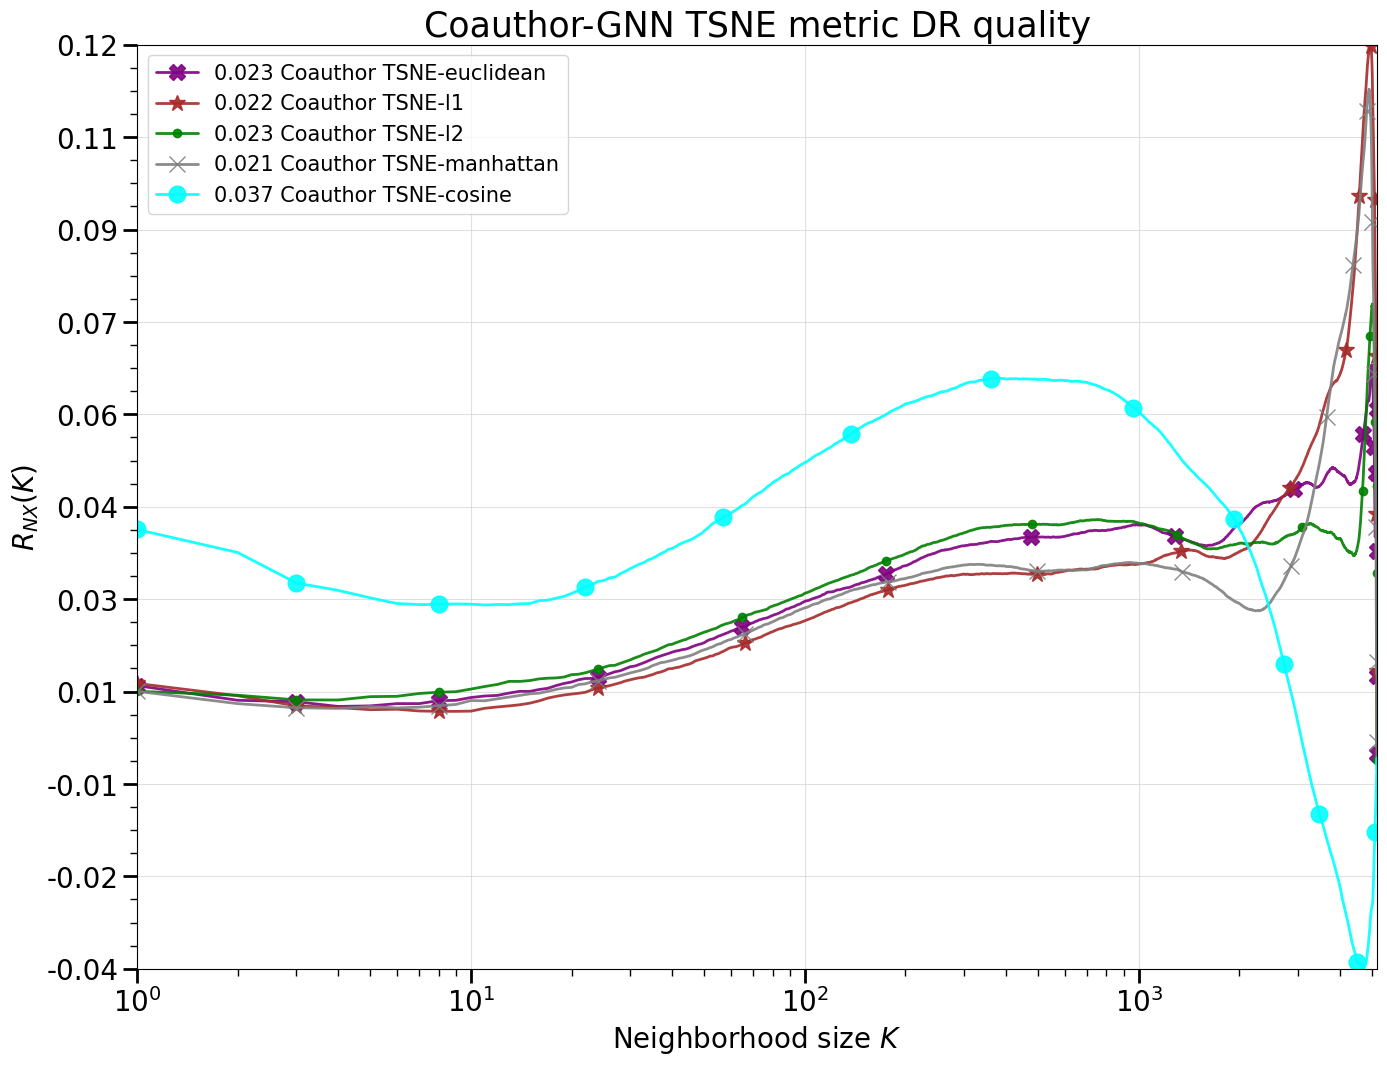

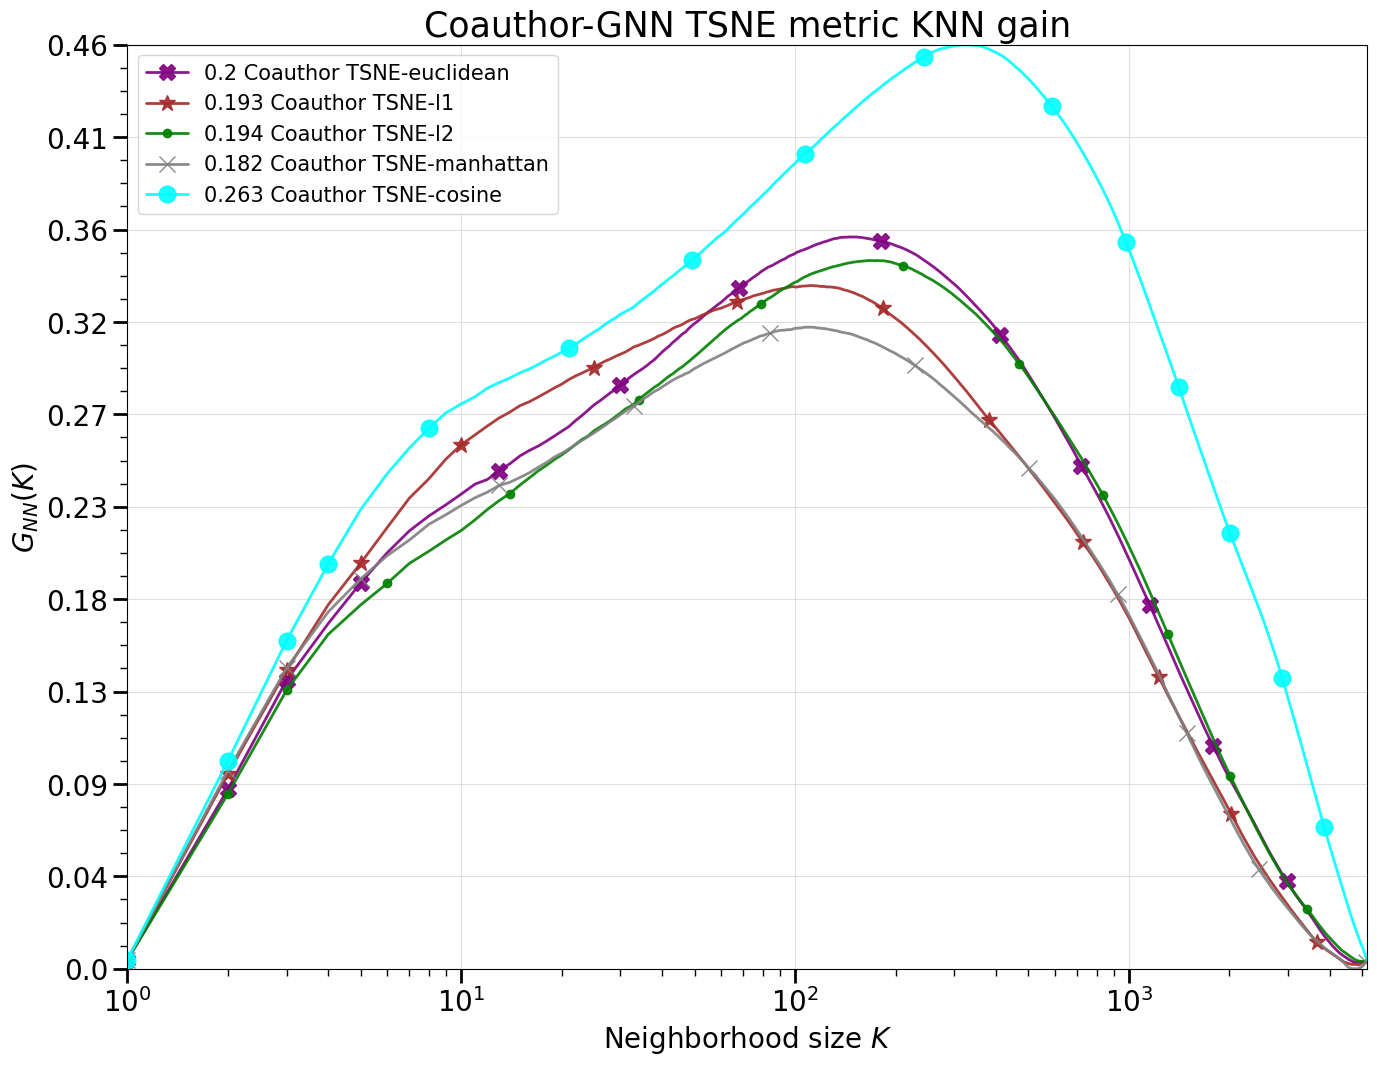

In [4]:
local_metrics = LocalMetric()

for dist in ['euclidean', 'l1', 'l2', 'manhattan', 'cosine']:
    # tsne = TSNE(n_components=2, random_state=random_state, metric=dist)
    # tsne_results = tsne.fit_transform(gnn_output)
    
    # df_umap = pd.DataFrame(tsne_results, columns=[f'{algorithm_name}1', f'{algorithm_name}2'])
    # df_umap['label'] = y
    # df_umap.to_csv(f'{dataset_name}_{original_gnn}_dist_{dist}_{algorithm_name}.csv', index=False)    

    df = pd.read_csv(f'{dataset_name}_{original_gnn}_dist_{dist}_{algorithm_name}.csv')
    X_reduced = df[[f'{algorithm_name}1', f'{algorithm_name}2']].values
    labels = df['label'].values
    
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=X_reduced,
        X_hds=X,
        labels=labels,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{dist}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE metric")

Calculating d_hd
Coauthor TSNE-300
Calculating d_hd
Coauthor TSNE-500
Calculating d_hd
Coauthor TSNE-1000
Calculating d_hd
Coauthor TSNE-2000
Calculating d_hd
Coauthor TSNE-5000
Finished.


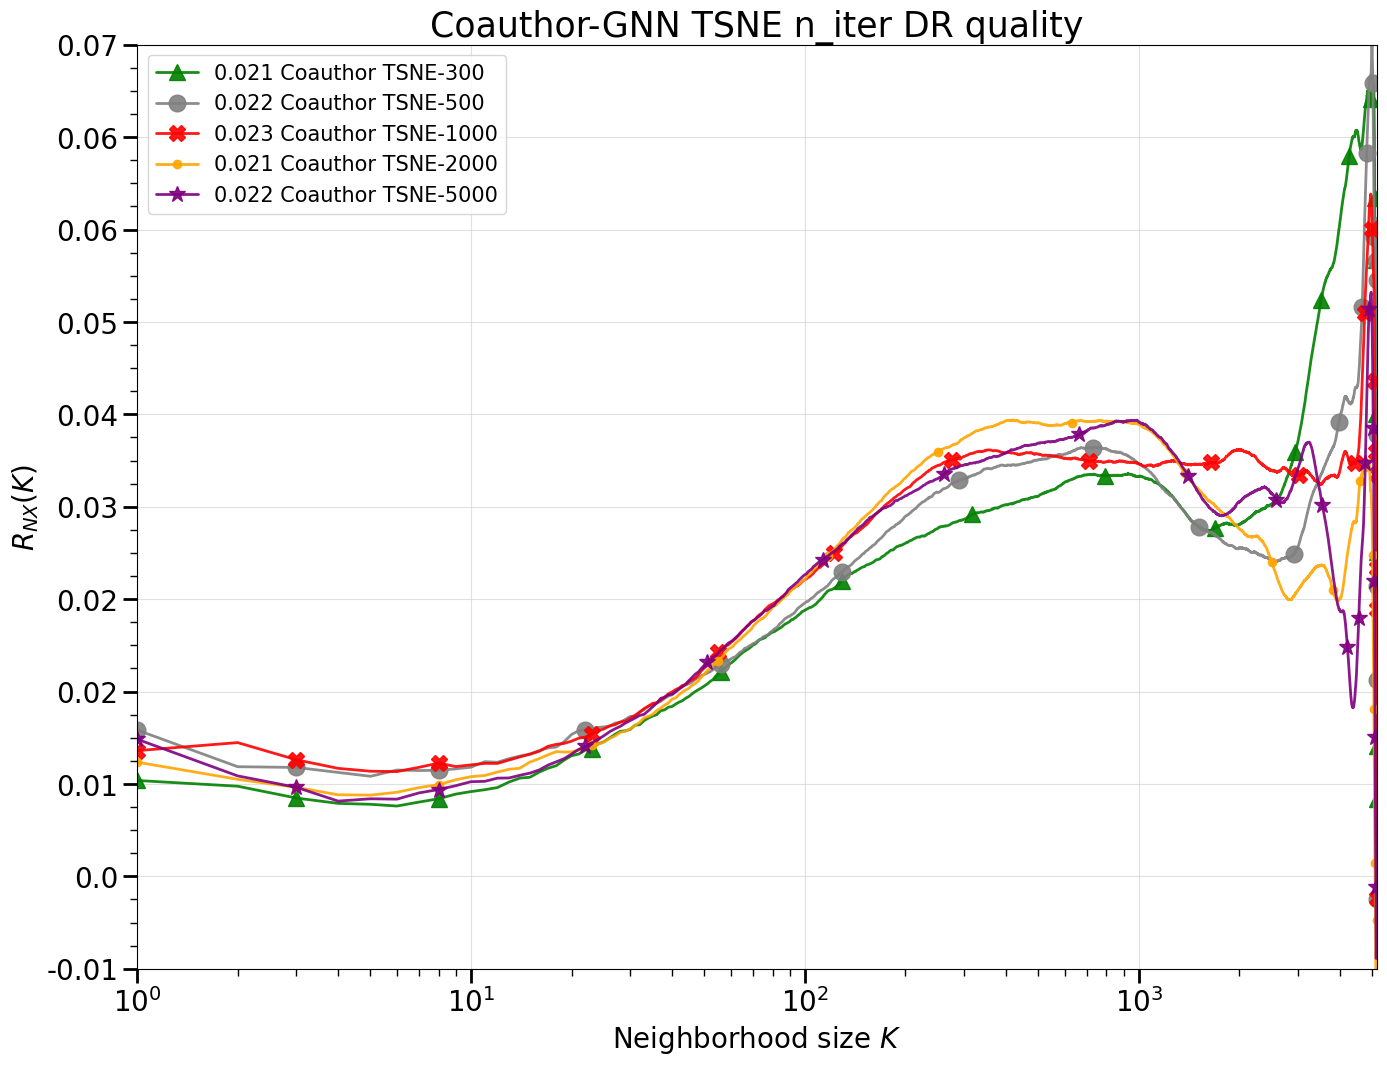

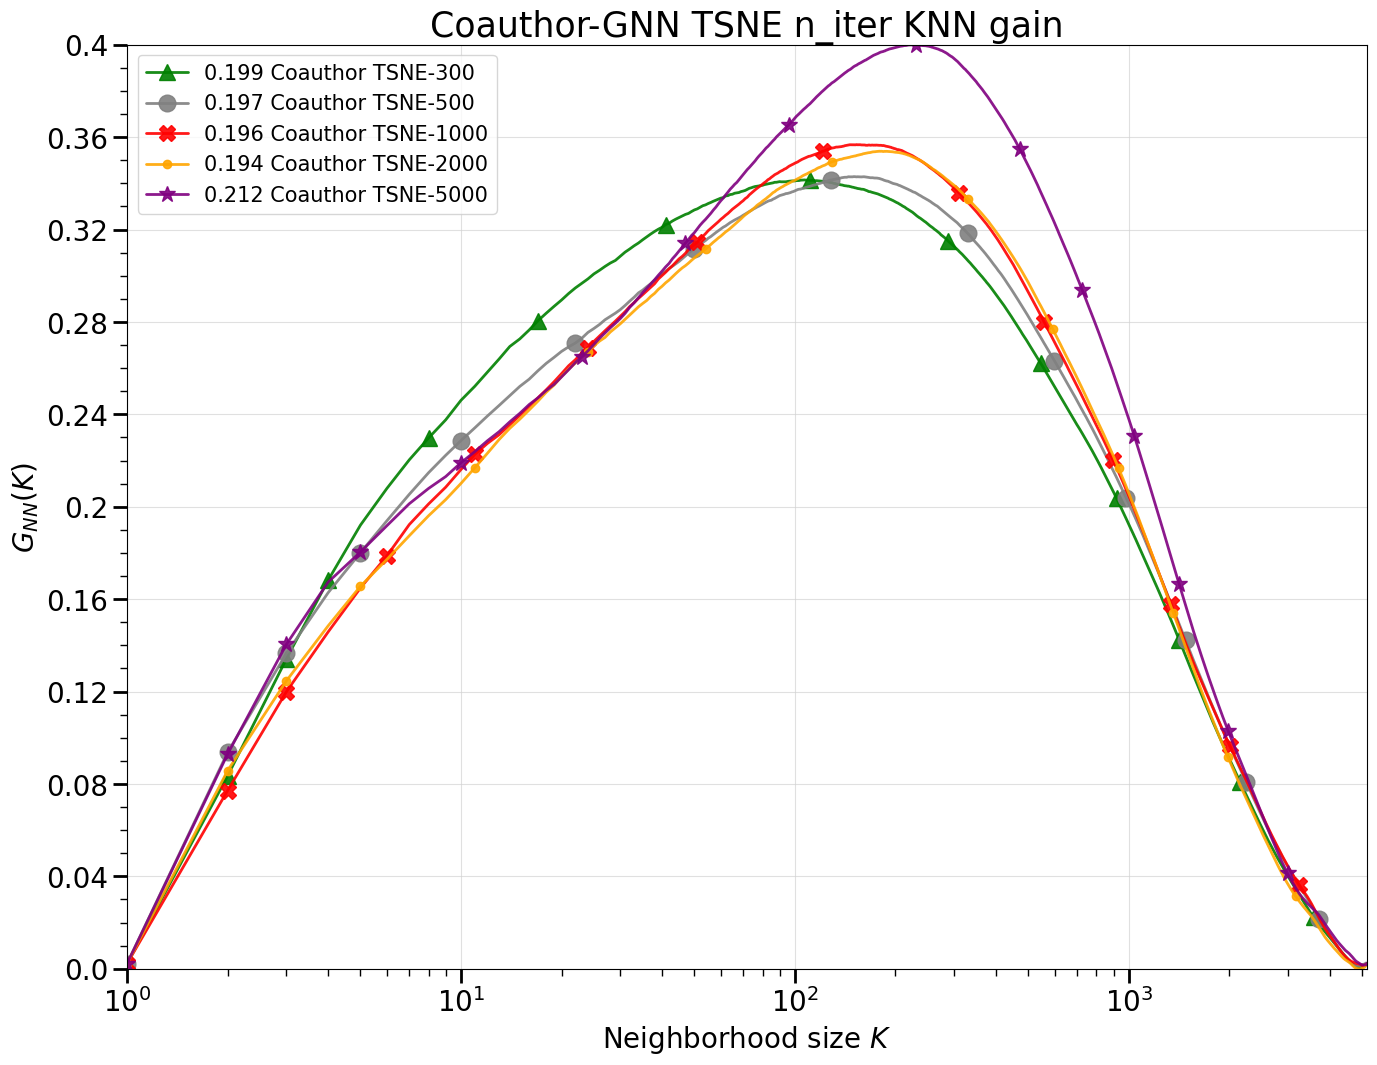

In [5]:
local_metrics = LocalMetric()

for n_iter in [300, 500, 1000, 2000, 5000]:
    # tsne = TSNE(n_components=2, random_state=random_state, n_iter=n_iter)
    # tsne_results = tsne.fit_transform(gnn_output)

    # df_umap = pd.DataFrame(tsne_results, columns=[f'{algorithm_name}1', f'{algorithm_name}2'])
    # df_umap['label'] = y
    # df_umap.to_csv(f'{dataset_name}_{original_gnn}_n_iter_{n_iter}_{algorithm_name}.csv', index=False)    
    
    df = pd.read_csv(f'{dataset_name}_{original_gnn}_n_iter_{n_iter}_{algorithm_name}.csv')
    X_reduced = df[[f'{algorithm_name}1', f'{algorithm_name}2']].values
    labels = df['label'].values
    
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=X_reduced,
        X_hds=X,
        labels=labels,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{n_iter}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE n_iter")

Calculating d_hd
Coauthor TSNE-10
Calculating d_hd
Coauthor TSNE-100
Calculating d_hd
Coauthor TSNE-500
Calculating d_hd
Coauthor TSNE-1000
Finished.


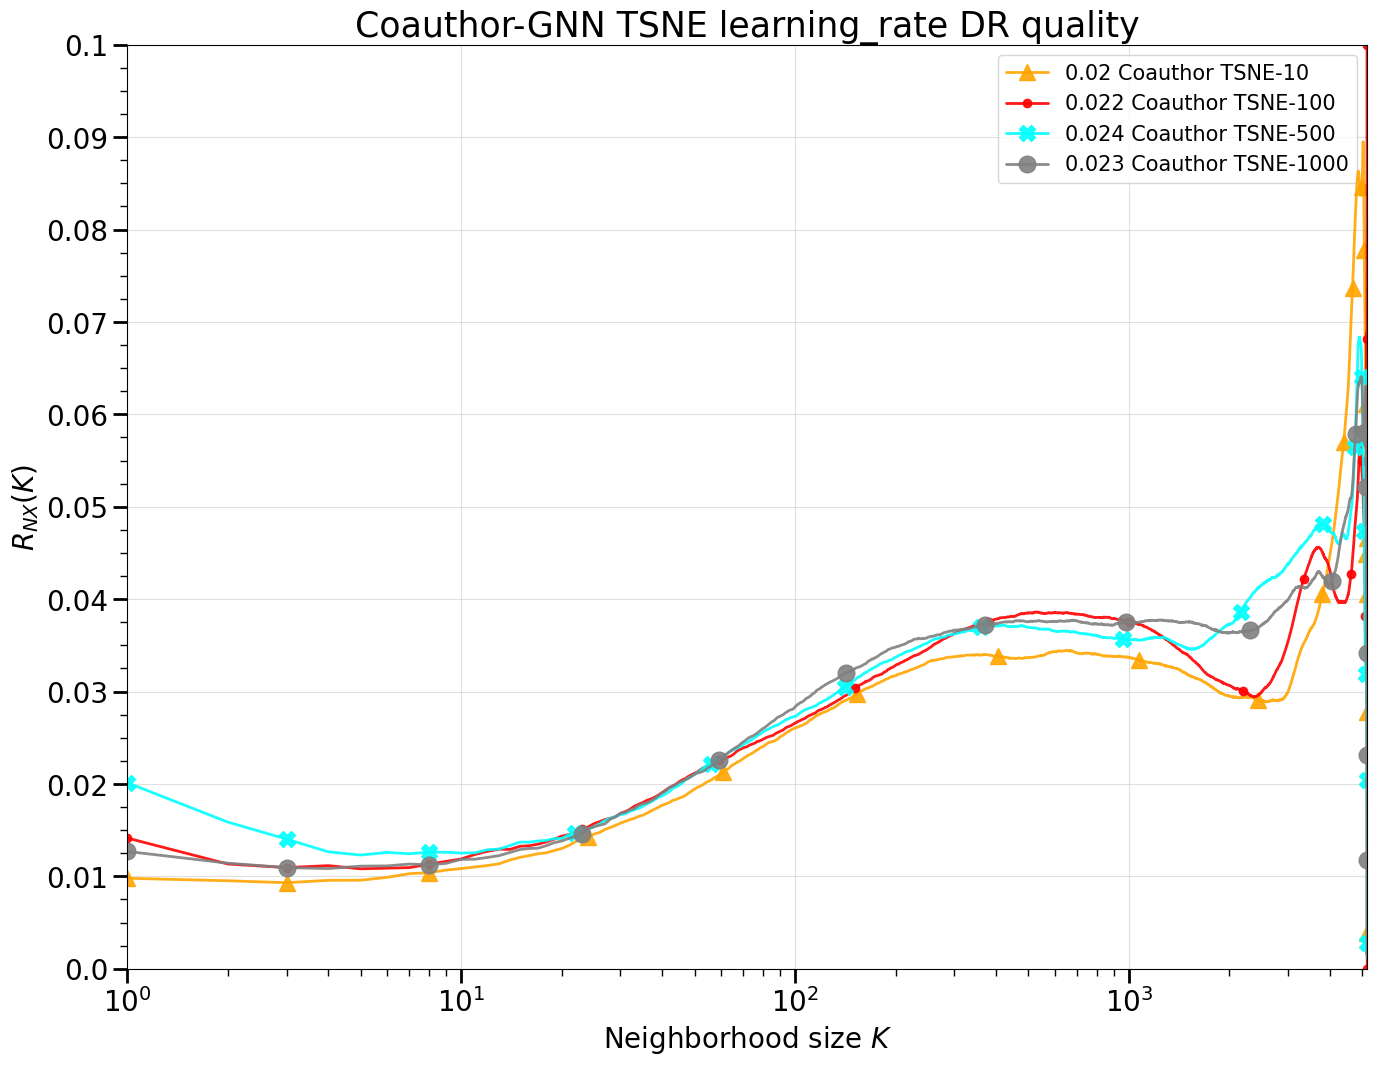

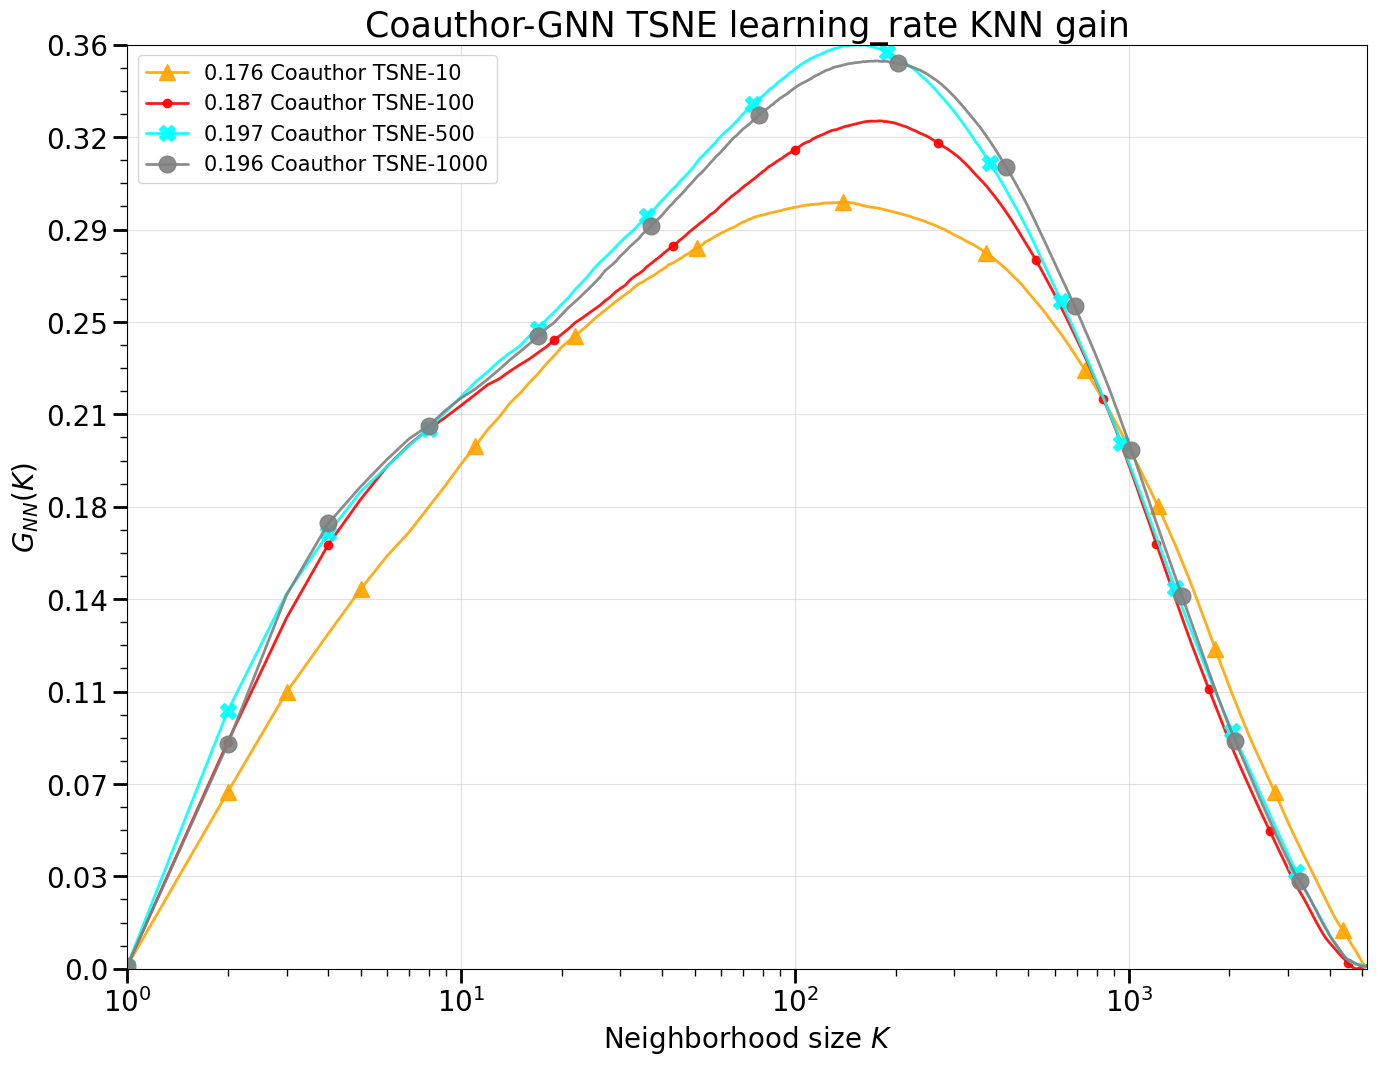

In [7]:
local_metrics = LocalMetric()

for learning_rate in [10, 100, 500, 1000]:
    # tsne = TSNE(n_components=2, random_state=random_state, learning_rate=learning_rate)
    # tsne_results = tsne.fit_transform(gnn_output)

    # df_umap = pd.DataFrame(tsne_results, columns=[f'{algorithm_name}1', f'{algorithm_name}2'])
    # df_umap['label'] = y
    # df_umap.to_csv(f'{dataset_name}_{original_gnn}_learning_rate_{learning_rate}_{algorithm_name}.csv', index=False)   

    df = pd.read_csv(f'{dataset_name}_{original_gnn}_learning_rate_{learning_rate}_{algorithm_name}.csv')
    X_reduced = df[[f'{algorithm_name}1', f'{algorithm_name}2']].values
    labels = df['label'].values
    
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=X_reduced,
        X_hds=X,
        labels=labels,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{learning_rate}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE learning_rate")

Calculating d_hd
Coauthor TSNE-5
Calculating d_hd
Coauthor TSNE-30
Calculating d_hd
Coauthor TSNE-50
Calculating d_hd
Coauthor TSNE-100
Finished.


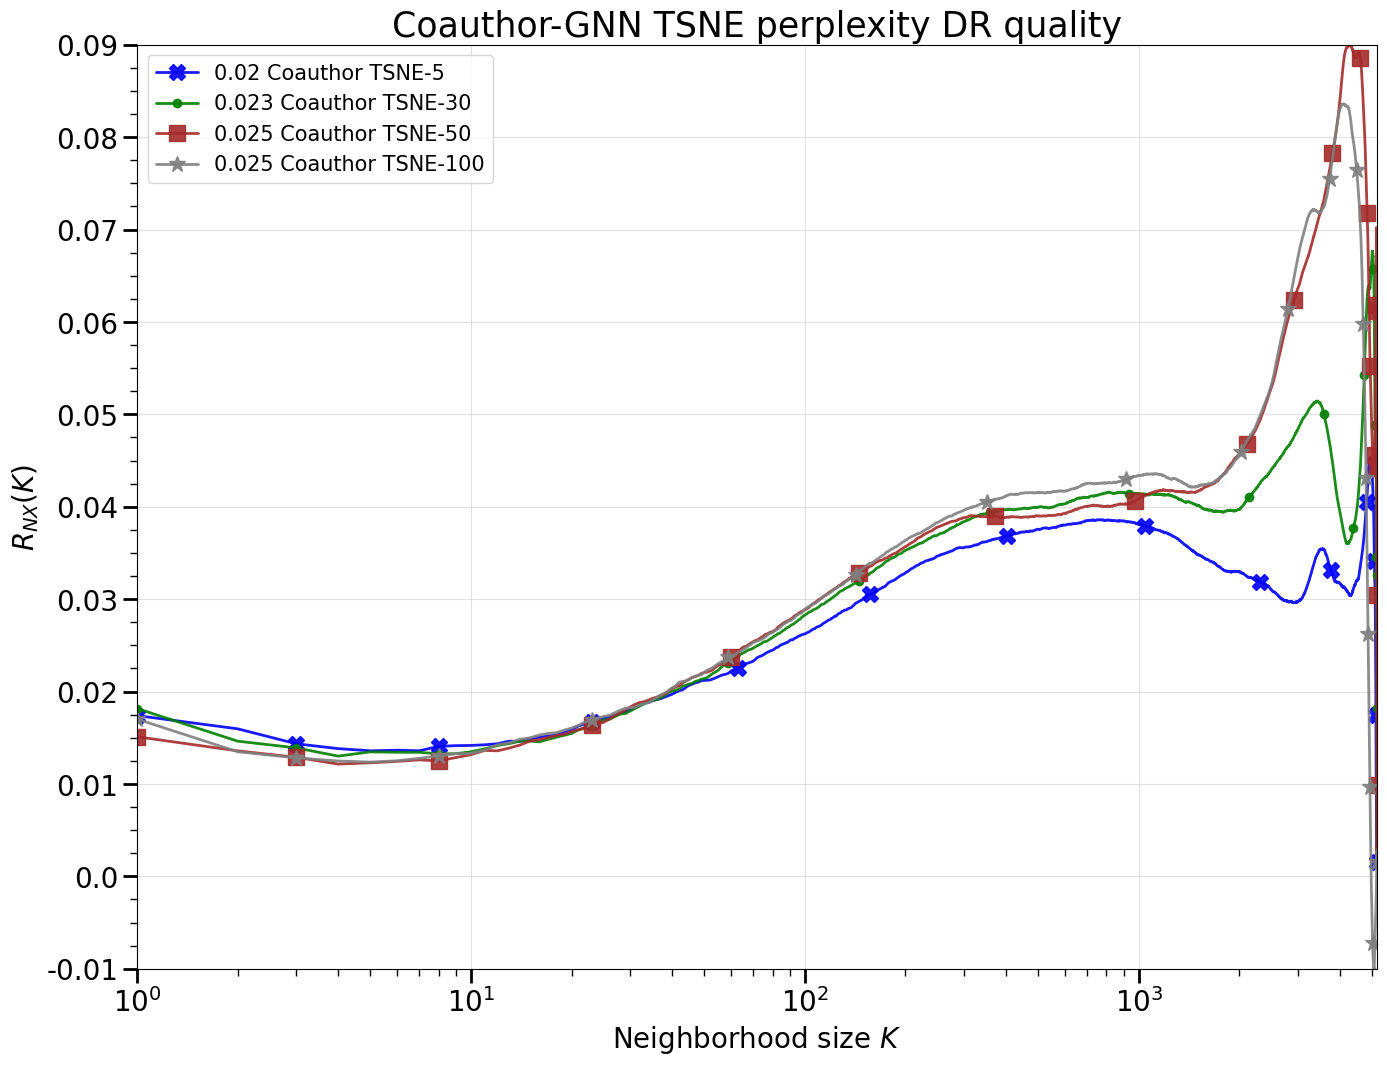

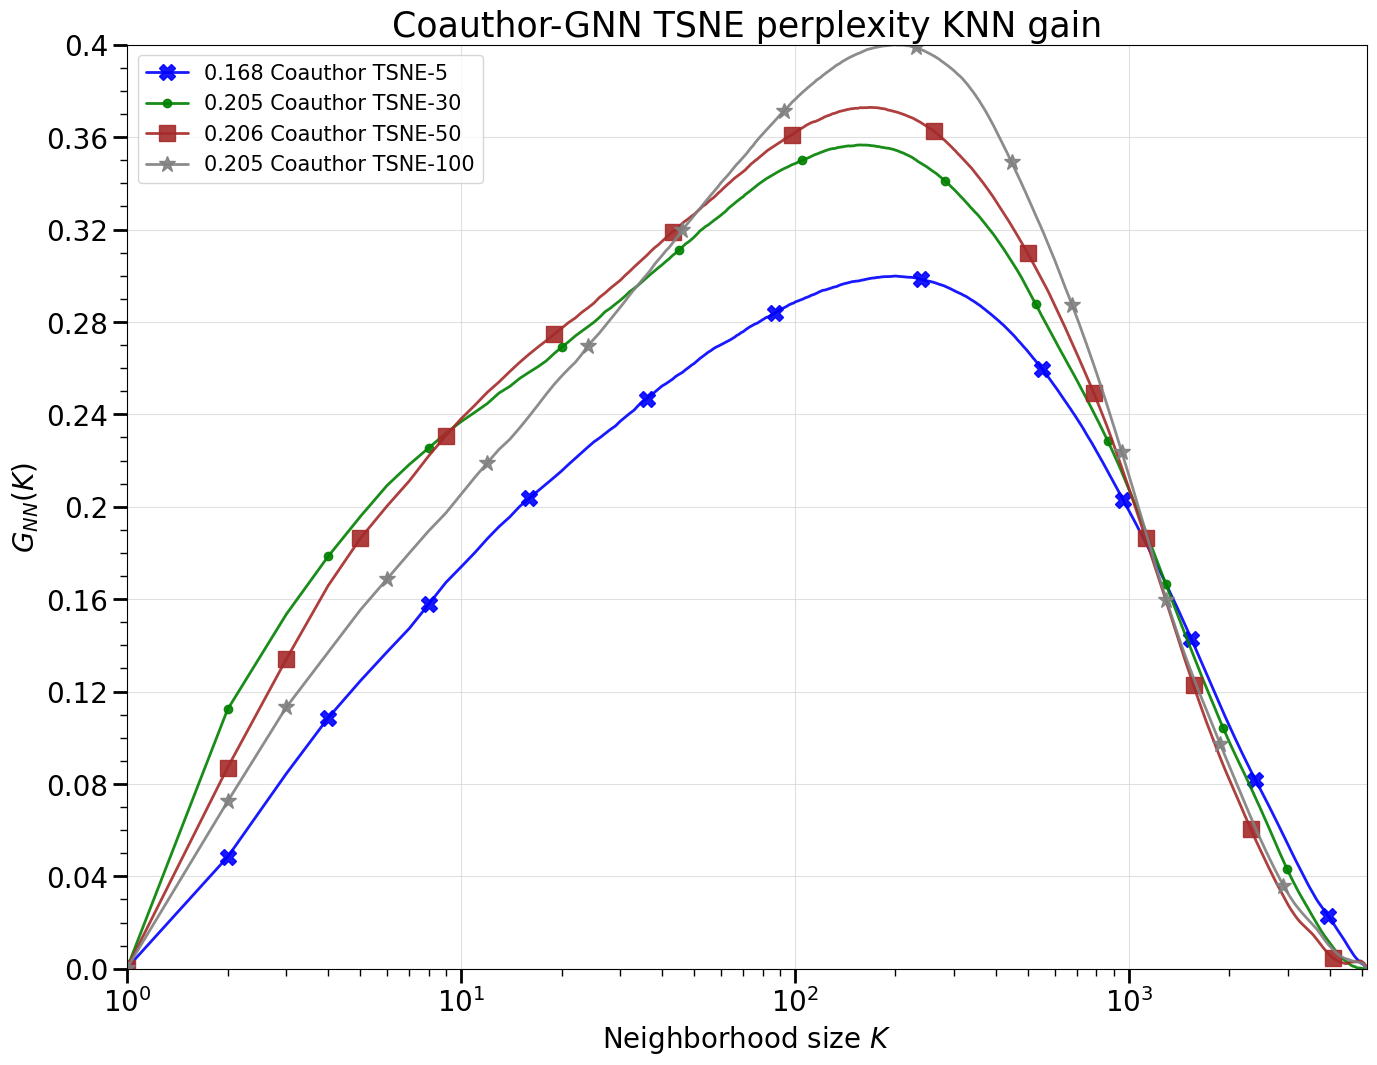

In [8]:
local_metrics = LocalMetric()

for perplexity in [5, 30, 50, 100]:
    # tsne = TSNE(n_components=2, random_state=random_state, perplexity=perplexity)
    # tsne_results = tsne.fit_transform(gnn_output)

    # df_umap = pd.DataFrame(tsne_results, columns=[f'{algorithm_name}1', f'{algorithm_name}2'])
    # df_umap['label'] = y
    # df_umap.to_csv(f'{dataset_name}_{original_gnn}_perplexity_{perplexity}_{algorithm_name}.csv', index=False)   

    df = pd.read_csv(f'{dataset_name}_{original_gnn}_perplexity_{perplexity}_{algorithm_name}.csv')
    X_reduced = df[[f'{algorithm_name}1', f'{algorithm_name}2']].values
    labels = df['label'].values
    
    local_metrics.calculate_knn_gain_and_dr_quality(
        X_lds=X_reduced,
        X_hds=X,
        labels=labels,
        method_name="{} {}".format(dataset_name, f"{algorithm_name}-{perplexity}"),
    )

local_metrics.visualize(f"{dataset_name}-{original_gnn} TSNE perplexity")